#Finding Outliers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = [48, 200, 55, 49, 43, 220, 50, 51, 46, 54,
210, 55, 53, 50, 60, 41, 47, 48, 44, 51,
55, 48, 45, 50, 51, 54, 43, 47, 56, 51]


(array([26.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([ 41. ,  58.9,  76.8,  94.7, 112.6, 130.5, 148.4, 166.3, 184.2,
        202.1, 220. ]),
 <BarContainer object of 10 artists>)

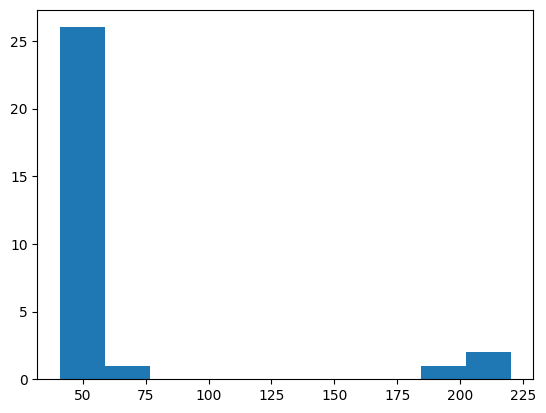

In [ ]:
plt.hist(dataset)

In [ ]:
#Z-Score
outliers = []
def detect_outliers():
  threshold = 2.75                 #With 3 only 1 outlier was detected
  mean = np.mean(dataset)
  sd = np.std(dataset)
  for i in dataset:
    z_score = (i-mean)/sd
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

detect_outliers()

[200, 220, 210]

##IQR

1. Sort the data
2. Calculate Q1(25%) and Q3(75%)
3. IQR(Q3-Q1)
4. Find the Lower Fence(q1-1.5(iqr))
5. Find the Upper Fence(q3+1.5(iqr))

In [ ]:
dataset = sorted(dataset)

In [ ]:
q1,q3 = np.percentile(dataset,[25,75])
iqr = q3-q1
print(q1,q3,iqr)

47.25 54.75 7.5


In [ ]:
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)

In [ ]:
outliers = []
for i in dataset:
  if i < lower_fence or i > upper_fence:
    outliers.append(i)
print(outliers)

[200, 210, 220]


In [ ]:
import seaborn as sns

<Axes: >

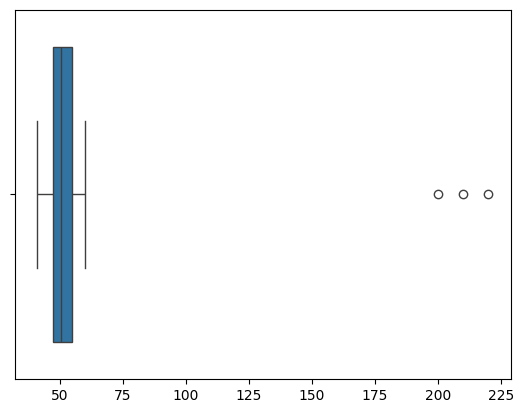

In [ ]:
sns.boxplot(dataset, orient="h")